#  Prosit Project Part I
## 1. Training thet Base Model from Scratch
> ##### 1.a. Imports
> ##### 1.b. the Model
> ##### 1.c. Training 
> ##### 1.d. Test
> ##### 1.e. Report
> ##### 1.f. Test with the Dongxue Holdout
> ##### 1.g. Report


### Imports & Model (1.a. & 1.b.)

In [1]:
import dlpro
from dlpro import constants, data, eval, layers, models, pipelines, reports, utils
import tensorflow as tf
from dlpro.eval.rt_eval import delta95_metric
from dlpro.eval.rt_eval import TimeDeltaMetric
from dlpro.data.RetentionTimeDataset import RetentionTimeDataset
from dlpro.models.prosit import PrositRetentionTimePredictor
from dlpro.reports.RetentionTimeReport import RetentionTimeReport

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from matplotlib.offsetbox import AnchoredText
# from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

# Wassim's density plot requirements
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator

# Saving the history as dict and pandas df
import pickle

In [2]:
SEQ_LENGTH = 30

In [3]:
weights_file_path = "./prosit_ekin_training_best_checkpoint"

In [4]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(weights_file_path, save_best_only=True, save_weights_only=True)
decay = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=0)
early_stop = tf.keras.callbacks.EarlyStopping(patience=10)
callbacks = [checkpoint, early_stop, decay]

In [4]:
# models can be later loaded by creating a model object and then loading the weights
trained_model = PrositRetentionTimePredictor(seq_length=SEQ_LENGTH)
#trained_model.load_weights('./prosit_tmt/modelx')
trained_model.load_weights(weights_file_path)

### 1.c. Training the Model From Scratch
> Training will be done with previous data that has been used to train the generic prosit that we could not be able to load the weights of 

In [7]:
TRAIN_DATAPATH = "/scratch/train_ekin/new_train_data.csv"
TEST_DATAPATH = "/scratch/train_ekin/new_holdout_data.csv"

rtdata = RetentionTimeDataset(data_source=TRAIN_DATAPATH,
                              pad_length=SEQ_LENGTH, batch_size=1024, val_ratio=0.25, test=False, sample_run=False)

test_rtdata = RetentionTimeDataset(data_source = TEST_DATAPATH,
                              pad_length=30, batch_size=64, test=True)

In [13]:
optimizer = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-7)

model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mean_absolute_error', TimeDeltaMetric(rtdata.data_mean, rtdata.data_std)])


NameError: name 'model' is not defined

In [34]:
history = model.fit(rtdata.train_data, epochs=100, 
                    validation_data=rtdata.val_data, callbacks=callbacks)

Epoch 1/100
551/551 [==============================] - 165s 291ms/step - loss: 0.4116 - mean_absolute_error: 0.4543 - timedelta: 40.1386 - val_loss: 0.0825 - val_mean_absolute_error: 0.1970 - val_timedelta: 16.4588
Epoch 2/100
551/551 [==============================] - 160s 289ms/step - loss: 0.0847 - mean_absolute_error: 0.2020 - timedelta: 17.2852 - val_loss: 0.0782 - val_mean_absolute_error: 0.1896 - val_timedelta: 15.4547
Epoch 3/100
551/551 [==============================] - 160s 290ms/step - loss: 0.0789 - mean_absolute_error: 0.1925 - timedelta: 16.0384 - val_loss: 0.0742 - val_mean_absolute_error: 0.1814 - val_timedelta: 14.6660
Epoch 4/100
551/551 [==============================] - 161s 292ms/step - loss: 0.0741 - mean_absolute_error: 0.1847 - timedelta: 16.0864 - val_loss: 0.0695 - val_mean_absolute_error: 0.1739 - val_timedelta: 14.3681
Epoch 5/100
551/551 [==============================] - 160s 290ms/step - loss: 0.0691 - mean_absolute_error: 0.1768 - timedelta: 15.1634 - v


Epoch 00075: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.
Epoch 76/100
551/551 [==============================] - 156s 283ms/step - loss: 0.0178 - mean_absolute_error: 0.0752 - timedelta: 7.2283 - val_loss: 0.0163 - val_mean_absolute_error: 0.0666 - val_timedelta: 5.8984
Epoch 77/100
551/551 [==============================] - 156s 283ms/step - loss: 0.0177 - mean_absolute_error: 0.0751 - timedelta: 7.2290 - val_loss: 0.0163 - val_mean_absolute_error: 0.0666 - val_timedelta: 5.8984
Epoch 78/100
551/551 [==============================] - 156s 283ms/step - loss: 0.0176 - mean_absolute_error: 0.0752 - timedelta: 6.8220 - val_loss: 0.0163 - val_mean_absolute_error: 0.0666 - val_timedelta: 5.8984

Epoch 00078: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.


> The weights are loaded and the model is trained again with the same data to see any improvement in the results

> I unfortunately used "history" variable again instead of "new_history" when retraining (fitting the new one) of the model with previous weights from the first training in 31.08.2021. But then interrupted the kernel and changed the variable's name.

In [11]:
new_history = trained_model.fit(rtdata.train_data, epochs=100, 
                    validation_data=rtdata.val_data, callbacks=callbacks)

Epoch 1/100
551/551 [==============================] - 164s 289ms/step - loss: 0.0177 - mean_absolute_error: 0.0752 - timedelta: 7.1969 - val_loss: 0.0163 - val_mean_absolute_error: 0.0666 - val_timedelta: 5.8907
Epoch 2/100
551/551 [==============================] - 159s 289ms/step - loss: 0.0176 - mean_absolute_error: 0.0752 - timedelta: 6.9778 - val_loss: 0.0163 - val_mean_absolute_error: 0.0666 - val_timedelta: 5.9030
Epoch 3/100
551/551 [==============================] - 157s 285ms/step - loss: 0.0176 - mean_absolute_error: 0.0750 - timedelta: 6.8497 - val_loss: 0.0163 - val_mean_absolute_error: 0.0666 - val_timedelta: 5.9050
Epoch 4/100
551/551 [==============================] - 156s 283ms/step - loss: 0.0177 - mean_absolute_error: 0.0750 - timedelta: 6.5975 - val_loss: 0.0163 - val_mean_absolute_error: 0.0665 - val_timedelta: 5.9013

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.
Epoch 5/100
551/551 [==============================] - 155s 281ms/s

### 1.d. Test with Holdout Bigdata

In [8]:
original_predictions = trained_model.predict(test_rtdata.test_data)

In [9]:
original_predictions = original_predictions.ravel()

In [10]:
original_predictions = rtdata.denormalize_targets(original_predictions)

In [11]:
original_predictions

array([106.32362 ,  50.407173, 116.559326, ...,  43.655704,  86.934944,
       106.27687 ], dtype=float32)

In [12]:
test_targets = test_rtdata.get_split_targets(split = "test")

In [13]:
test_targets

array([106.85361792,  53.66648129, 111.97376267, ...,  43.88259566,
        81.972167  , 110.08648948])

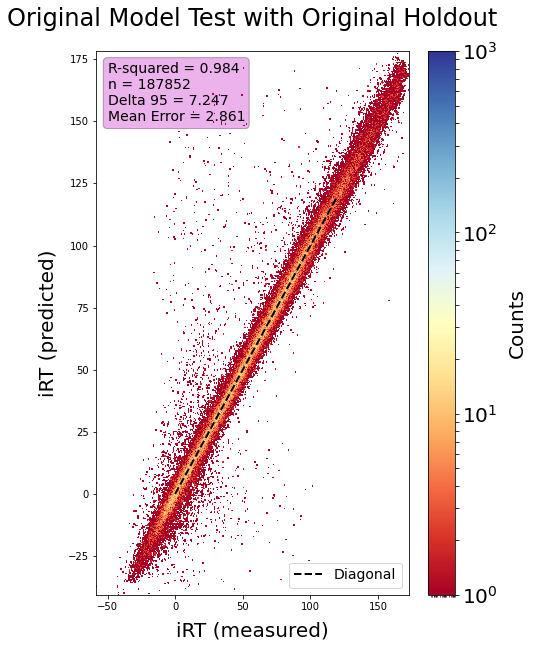

In [29]:
density_plot(original_predictions, test_targets, header = "Original Model Test with Original Holdout")

### 1.e. Report for the Base Model Training from scratch

In [ ]:
report # define it with Omar's TMT_Prosit script's way

In [45]:
report.plot_keras_metric("loss")
report.plot_keras_metric("mean_absolute_error")
report.plot_keras_metric("timedelta")

NameError: name 'report' is not defined

In [46]:
report.calculate_r2(test_targets, predictions)

NameError: name 'report' is not defined

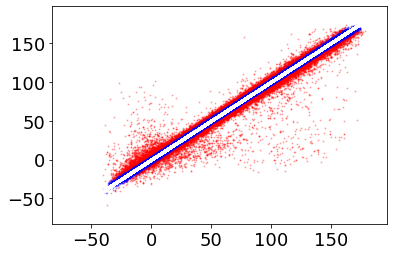

In [63]:
plot_95_percent = report.plot_highlight_data_portion(test_targets, predictions, portion=0.95)

### Density Scatter Plot

In [5]:
def density_plot(predictions, experimental, header = "title", nbins = 1000):
    
    matplotlib.rcParams["axes.titlepad"] = 25
    matplotlib.rcParams["axes.labelpad"] = 10
    
    df = pd.DataFrame({"predictions" : np.ravel(predictions), "test_targets" : np.ravel(experimental)})

    H, xedges, yedges = np.histogram2d(df["predictions"],df["test_targets"], bins=nbins) # df[x] yerine df["predictions"] kullan, predictions -> x yerine
    H = np.rot90(H)
    H = np.flipud(H)
    Hmasked = np.ma.masked_where(H==0,H) 
    cm = plt.cm.get_cmap('RdYlBu')
    
    plt.figure(figsize = (7,10))    
    plt.pcolormesh(xedges, yedges, Hmasked, cmap = cm, norm = LogNorm(1e0,1e3))
    
    plt.xlabel("iRT (measured)", fontsize = 20)  # irt for the indexed dongxue tissue data
    plt.ylabel("iRT (predicted)",  fontsize = 20)
    plt.title(header, fontsize = 24)
    
    cbar = plt.colorbar( ticks = LogLocator(subs = range(10)))
    cbar.ax.set_ylabel('Counts', fontsize = 20)
    cbar.ax.tick_params(labelsize = 20)
    cbar.ax.minorticks_on()
    
    a = np.percentile(np.abs(df["predictions"] - df["test_targets"]), 95)
    b = np.mean(np.abs(df["predictions"] - df["test_targets"]))
    
    plt.text(2,108,"R-squared = {:.3f}\nn = {:3d}\nDelta 95 = {:.3f}\nMean Error = {:.3f}".format(r2_score(df["test_targets"], df["predictions"]) , len(df["test_targets"]), a, b), 
             fontsize = 14, bbox = dict(facecolor = "m", alpha = 0.3, boxstyle = "round"))
    
    plt.plot([0, 125], [0, 125], ls = "--", linewidth = "2", color = "black", label= "Diagonal") 
    # plt.plot([0, 120], [3, 123], color = "black", label= "upper 95%")
    # plt.plot([0, 120], [-3, 117], color = "green", label= "lower 95%")
    plt.legend(loc=4, prop={"size": 14})
    
    plt.savefig("./Ekin_plots/{} Density Plot.png".format(header), bbox_inches="tight", pad_inches = 1, dpi = 300, transparent= None)

> A test with the original trained model with Dongxue Holdout set, just to see the performance on Dongxue with the new scatter density plot 

In [1]:
SEQ_LENGTH = 30

In [3]:
weights_file_path = "./prosit_ekin_training_best_checkpoint"

In [4]:
# Wassim's density plot requirements
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator

# Saving the history as dict and pandas df
import pandas as pd
import pickle

In [5]:
trained_model = PrositRetentionTimePredictor(seq_length=SEQ_LENGTH)

In [6]:
trained_model.load_weights(weights_file_path)

### 1.f. Test with the Dongxue Holdout

In [33]:
DONGXUE_TEST_DATAPATH = "/scratch/dongxue/dongxue_holdout_data.csv"

dongxue_test_rtdata = RetentionTimeDataset(data_source = DONGXUE_TEST_DATAPATH,
                              pad_length=30, batch_size=64, test=True)

DONGXUE_TRAIN_DATAPATH = "/scratch/dongxue/dongxue_train_data.csv" # for denormalizing the test_targets

dongxue_rtdata = RetentionTimeDataset(data_source=DONGXUE_TRAIN_DATAPATH,
                              pad_length=SEQ_LENGTH, batch_size=1024, val_ratio=0.25, test=False, sample_run=False)


In [34]:
dongxue_predictions = trained_model.predict(dongxue_test_rtdata.test_data)

In [35]:
dongxue_predictions = dongxue_predictions.ravel()

In [36]:
dongxue_predictions = dongxue_rtdata.denormalize_targets(dongxue_predictions)

In [37]:
dongxue_test_targets = dongxue_test_rtdata.get_split_targets(split = "test")

In [17]:
density_plot(dongxue_predictions, dongxue_test_targets, header = "Original Model Test with Dongxue Holdout\n(Denormalization with Dongxue Training)")

NameError: name 'dongxue_predictions' is not defined

### Test With Yangyang Dataset

In [4]:
trained_model = PrositRetentionTimePredictor(seq_length=SEQ_LENGTH)

In [5]:
trained_model.load_weights(weights_file_path)

In [22]:
TEST_DATAPATH = "/scratch/yangyang/yangyang_data.csv" 

# RetentionTimeDataset object requires the data to have "irt" header for retention time column 
yangyang_test_rtdata = RetentionTimeDataset(data_source = TEST_DATAPATH,
                              pad_length=30, batch_size=64, test=True)

In [23]:
yangyang_predictions = trained_model.predict(yangyang_test_rtdata.test_data)

In [24]:
yangyang_predictions = yangyang_predictions.ravel()

In [25]:
yangyang_predictions = yangyang_test_rtdata.denormalize_targets(yangyang_predictions)

In [26]:
yangyang_test_targets = yangyang_test_rtdata.get_split_targets(split = "test")

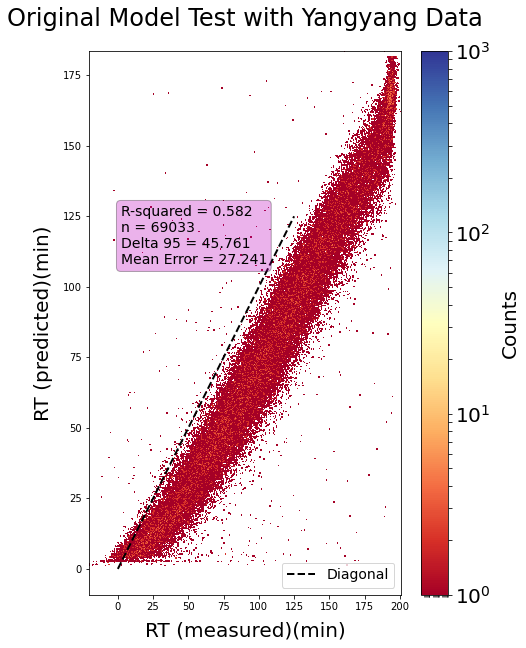

In [27]:
density_plot(yangyang_predictions, yangyang_test_targets, header = "Original Model Test with Yangyang Data")

### Test With Donxgue Tissue P013129

> The dongxue_P01 data sets (whole, train, holdout) are not indexed, thus the column name and axis names for the following work should be "rt" only, but Omar's framework only accepts "irt" column name for the data will be used. So the column names are changed to "irt" manually in all three datasets.

In [6]:
trained_model = PrositRetentionTimePredictor(seq_length=SEQ_LENGTH)

In [7]:
trained_model.load_weights(weights_file_path)

In [8]:
TISSUE_DATAPATH = "/scratch/dongxue_tissue/dongxue_P013129.csv" # not valid any more

# RetentionTimeDataset object requires the data to have "irt" header for retention time column 
tissue_rt_data = RetentionTimeDataset(data_source = TISSUE_DATAPATH,
                              pad_length=30, batch_size=64, test=True)

In [9]:
tissue_predictions = trained_model.predict(tissue_rt_data.test_data)

In [10]:
tissue_predictions = tissue_predictions.ravel()

In [11]:
tissue_predictions = tissue_rt_data.denormalize_targets(tissue_predictions)

In [12]:
tissue_test_targets = tissue_rt_data.get_split_targets(split = "test")

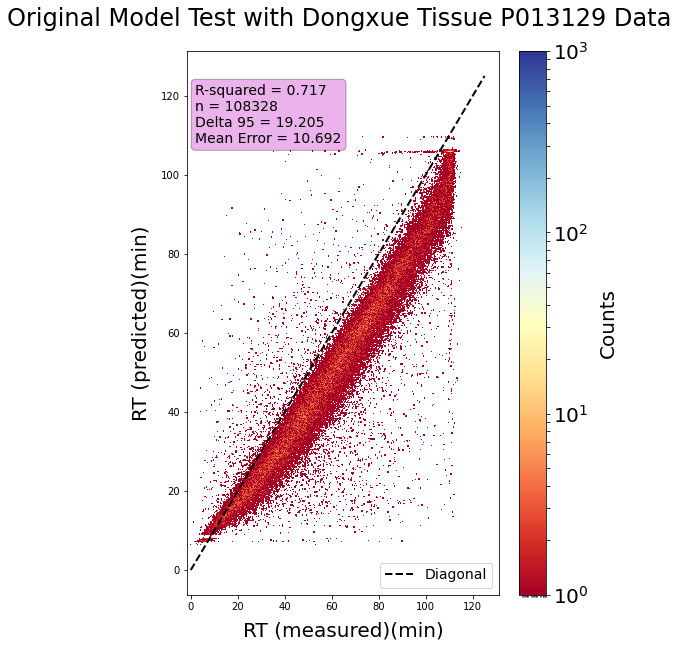

In [21]:
density_plot(tissue_predictions, tissue_test_targets, header = "Original Model Test with Dongxue Tissue P013129 Data ")

### Test With indexed Donxgue Tissue P013129

In [11]:
trained_model = PrositRetentionTimePredictor(seq_length=SEQ_LENGTH)

In [12]:
trained_model.load_weights(weights_file_path)

In [14]:
TISSUE_DATAPATH = "/scratch/dongxue_tissue_0.01FDR/dongxue_P013129_irt_holdout_data.csv" # test with whole indexed dataset 

# RetentionTimeDataset object requires the data to have "irt" header for retention time column 
tissue_irt_data = RetentionTimeDataset(data_source = TISSUE_DATAPATH,
                              pad_length=30, batch_size=64, test=True)

In [15]:
TRAIN_DATAPATH = "/scratch/prosit_original/new_train_data.csv"

rtdata = RetentionTimeDataset(data_source=TRAIN_DATAPATH,
                              pad_length=SEQ_LENGTH, batch_size=1024, val_ratio=0.25, test=False, sample_run=False)

In [16]:
tissue_predictions = trained_model.predict(tissue_irt_data.test_data)

In [17]:
tissue_predictions = tissue_predictions.ravel()

In [18]:
tissue_predictions = rtdata.denormalize_targets(tissue_predictions)

In [19]:
tissue_test_targets = tissue_irt_data.get_split_targets(split = "test")

In [20]:
def density_plot(predictions, experimental, header = "title", nbins = 1000):
    
    matplotlib.rcParams["axes.titlepad"] = 25
    matplotlib.rcParams["axes.labelpad"] = 10
    
    df = pd.DataFrame({"predictions" : np.ravel(predictions), "test_targets" : np.ravel(experimental)})

    H, xedges, yedges = np.histogram2d(df["predictions"],df["test_targets"], bins=nbins) # df[x] yerine df["predictions"] kullan, predictions -> x yerine
    H = np.rot90(H)
    H = np.flipud(H)
    Hmasked = np.ma.masked_where(H==0,H) 
    cm = plt.cm.get_cmap('RdYlBu')
    
    plt.figure(figsize = (7,10))    
    plt.pcolormesh(xedges, yedges, Hmasked, cmap = cm, norm = LogNorm(1e0,1e1))
    
    plt.xlabel("iRT (measured)", fontsize = 20)  # irt for the indexed dongxue tissue data
    plt.ylabel("iRT (predicted)",  fontsize = 20)
    plt.title(header, fontsize = 24)
    
    cbar = plt.colorbar( ticks = LogLocator(subs = range(10)))
    cbar.ax.set_ylabel('Counts', fontsize = 20)
    cbar.ax.tick_params(labelsize = 20)
    # cbar.ax.minorticks_on()
    
    a = np.percentile(np.abs(df["predictions"] - df["test_targets"]), 95)
    b = np.mean(np.abs(df["predictions"] - df["test_targets"]))
    
    plt.text(-25,175,"R-squared = {:.3f}\nn = {:3d}\nDelta 95 = {:.3f}\nMean Error = {:.3f}".format(r2_score(df["test_targets"], df["predictions"]) , len(df["test_targets"]), a, b), 
             fontsize = 14, bbox = dict(facecolor = "m", alpha = 0.3, boxstyle = "round"))
    
    plt.plot([-25, 200], [-25, 200], ls = "--", linewidth = "2", color = "black", label= "Diagonal") 
    # plt.plot([0, 120], [3, 123], color = "black", label= "upper 95%")
    # plt.plot([0, 120], [-3, 117], color = "green", label= "lower 95%")
    plt.legend(loc=4, prop={"size": 14})
    
    plt.savefig("./Ekin_plots/{} Density Plot.png".format(header), bbox_inches="tight", pad_inches = 1, dpi = 300, transparent= None)

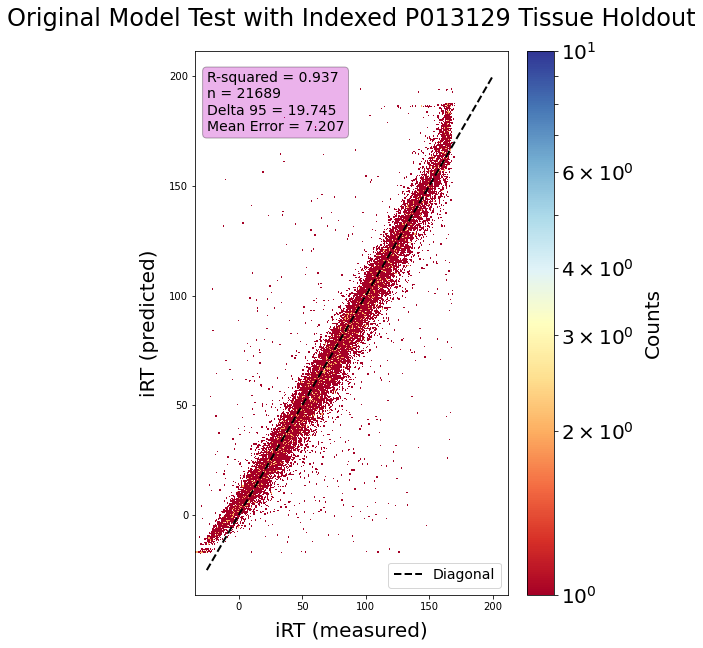

In [21]:
density_plot(tissue_predictions, tissue_test_targets, header = "Original Model Test with Indexed P013129 Tissue Holdout")